In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.settings.verbosity = 3

In [3]:
import os
os.chdir('/hpcscratch/ieo/DIMA/scmultiome_mpi/')

# import data

In [6]:
adata_path='/hpcnfs/scratch/DIMA/piva/mpi_freiburg/adata/adata_annotation.h5ad'
adata=sc.read_h5ad(adata_path)

In [7]:
adata

AnnData object with n_obs × n_vars = 22358 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublets', 'dataset', 'sample', 'stage', 'replicate', 'nCount_ATAC', 'nFeature_ATAC', 'integrated_snn_res.0.8', 'ident', 'leiden_res15', 'leiden_res12', 'leiden_res1', 'annotation_leiden12', 'group'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol'
    uns: 'X_name', 'annotation2_colors', 'annotation_leiden12_3_colors', 'annotation_leiden12_colors', 'dataset_colors', 'dendrogram_annotation2', 'dendrogram_annotation_leiden12', 'dendrogram_annotation_leiden12_3', 'dendrogram_leiden_res12', 'dendrogram_seurat_clusters', 'hvg', 'ident_colors', 'leiden', 'leiden_res12_colors', 'leiden_res15_colors', 'neighbors', 'sample_colors', 'seurat_clusters_colors', 'umap'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
adata.var.head()

,highly_variable,means,dispersions,dispersions_norm,symbol
FB_id,,,,,
FBgn0032629,True,1.286782,4.758719,2.731847,beat-IIIc
FBgn0003411,True,1.206545,4.561761,2.416497,sisA
FBgn0086690,True,1.726876,4.827383,3.500521,Plp
FBgn0016053,True,1.164845,5.812886,4.419677,pgc
FBgn0035572,True,0.627036,4.019359,3.186431,CG13711


In [9]:
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,doublets,dataset,sample,stage,replicate,nCount_ATAC,nFeature_ATAC,integrated_snn_res.0.8,ident,leiden_res15,leiden_res12,leiden_res1,annotation_leiden12,group
ez.5.1_AAACAGCCACAAAGCG-1,SeuratProject,1042.0,520,13.819578,2,3,Singlet,ez.5.1,ez,5,1,4725.0,3801,3,neuroectoderm,15,12,7,neuroectoderm,ez-neuroectoderm
ez.5.1_AAACCAACACCAACCG-1,SeuratProject,686.0,340,14.723032,2,11,Singlet,ez.5.1,ez,5,1,2861.0,2381,11,dorsal_ectoderm,6,7,7,ventral_ectoderm,ez-ventral_ectoderm
ez.5.1_AAACCAACATTAGCCA-1,SeuratProject,1266.0,579,17.851501,3,10,Singlet,ez.5.1,ez,5,1,11806.0,8144,10,yolk,10,11,12,yolk,ez-yolk
ez.5.1_AAACGCGCACAATACT-1,SeuratProject,878.0,515,15.375854,2,1,Singlet,ez.5.1,ez,5,1,1669.0,1521,1,dorsal_ectoderm,13,6,3,anterior_endoderm,ez-anterior_endoderm
ez.5.1_AAACGGATCGAGGTGG-1,SeuratProject,1348.0,714,9.495549,0,11,Singlet,ez.5.1,ez,5,1,6881.0,5242,11,dorsal_ectoderm,6,7,7,ventral_ectoderm,ez-ventral_ectoderm


In [10]:
adataRNA=sc.read_h5ad('/hpcscratch/ieo/DIMA/scmultiome_mpi/mergelink_clustered_5_RNAassay.h5ad')

# visualization

In [11]:
adata.var['FB_id']=adata.var.index
adata.var.set_index('symbol',inplace=True)

In [16]:
adata.obs['annotation_leiden12'].unique()

order_germ=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk',
 'undifferentiated_cells',  'pluripotent_progenitors']
order_germ_wt=[ 'mesoderm','anterioposterior_ectoderm', 'dorsal_ectoderm','neuroectoderm', 'ventral_ectoderm',  'anterior_endoderm', 'posterior_endoderm','yolk', 'undifferentiated_cells']

In [ ]:
germlayer_markergenes=pd.read_csv('germlayer_markergenes.csv').drop(['Unnamed: 0','index'],axis=1)
markers=germlayer_markergenes.groupby('germlayer')['gene'].apply(list).to_dict()

In [17]:
list(markers.values())
all_markes=[item for sublist in list(markers2.values()) for item in sublist]

In [18]:
conv_symbol2fb=adata.var['FB_id'].to_dict()
conv_fb2symbol = {v: k for k, v in conv_symbol2fb.items()}

In [19]:
sc.pp.normalize_total(adataRNA, target_sum=1e6) #CPM
sc.pp.log1p(adataRNA)

normalizing counts per cell
    finished (0:00:00)


In [20]:
adataRNA.var['symbol']=adataRNA.var.index.map(conv_fb2symbol)

In [21]:
adataRNA.var.loc[adataRNA.var[adataRNA.var['symbol'].isna()].index,'symbol']=adataRNA.var.loc[adataRNA.var[adataRNA.var['symbol'].isna()].index].index

In [22]:
adataRNA.var.set_index('symbol',inplace=True)

In [23]:
adataRNA.obs['annotation_leiden12']=adata.obs['annotation_leiden12']

## logFC

In [24]:
adataRNA.obs['group']=adata.obs['group']

In [25]:
adataRNA.var

""
symbol
Myo81F
FBgn0085804
FBgn0039987
FBgn0267798
FBgn0267797
...
FBgn0267595
FBgn0259864
FBgn0085506


In [26]:
adatanejwt=adataRNA[adataRNA.obs['sample']!='ez']

In [27]:
pairs_dict={
        'yolk':  ['nej-yolk','wt-yolk'],
    'undifferentiated_cells':['nej-undifferentiated_cells','wt-undifferentiated_cells']
}

In [28]:
resfc={}
resppv={}
respct=[]
for k,v in pairs_dict.items():
    sc.tl.rank_genes_groups(adatanejwt, 'group',groups=[v[0]], reference=v[1],
                            method='wilcoxon', key_added = "%s_wilcoxon"%(k), pts=True)

    result = adatanejwt.uns["%s_wilcoxon"%(k)]
    groups = result['names'].dtype.names
    result = pd.DataFrame(
        {group + '_' + key: result[key][group]
        for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
   # resfc[k]=[result[['ez-%s_names'%(k),'ez-%s_logfoldchanges'%(k)]]  ]  # considering pvalue?
    result.set_index('nej-%s_names'%(k),inplace=True)
    result=result.loc[all_markes]
    resfc['nej-%s_logfoldchanges'%(k)]=result['nej-%s_logfoldchanges'%(k)]
    resppv['nej-%s_pvals_adj'%(k)]=result['nej-%s_pvals_adj'%(k)]
    
    respct.append(adatanejwt.uns["%s_wilcoxon"%(k)]['pts'])

ranking genes


/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['yolk_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
ranking genes


/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['undifferentiated_cells_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [29]:
resfc=pd.DataFrame.from_dict(resfc)
resfc.head()

,nej-yolk_logfoldchanges,nej-undifferentiated_cells_logfoldchanges
GEFmeso,-1.264505,-0.561459
Mes2,-1.888798,-0.729203
NetA,-29.430801,-1.521546
ltl,-3.691697,-0.247569
sna,-1.317183,1.878985


In [30]:
resppv=pd.DataFrame.from_dict(resppv)
resppv.head()

,nej-yolk_pvals_adj,nej-undifferentiated_cells_pvals_adj
GEFmeso,1.0,1.0
Mes2,1.0,1.0
NetA,1.0,1.0
ltl,1.0,1.0
sna,1.0,1.0


In [100]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-4, vcenter=0., vmax=4)
#pcolormesh(resfc.loc[all_markes], cmap="coolwarm", norm=divnorm)

In [101]:
#resppv=resppv.T
resppvsign=resppv<0.05
# resppvsign.replace(False, '',inplace=True)
# resppvsign.replace(True, '*',inplace=True)
resppvsign

,nej-yolk_pvals_adj,nej-undifferentiated_cells_pvals_adj
GEFmeso,False,False
Mes2,False,False
NetA,False,False
ltl,False,False
sna,False,False
stumps,False,False
twi,False,False
wgn,False,False
zfh1,False,False
Abd-B,False,False


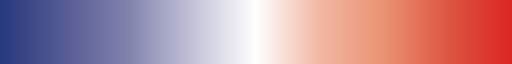

In [102]:

cmap_blured = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                  list(['#273a7e', '#575c95','#8183ae', '#c4c2d8', 
                                                                       'white', 
                                                                       '#f3b7a3', '#eb9374', '#de5742', '#dc2624'
                                                                 ] ))
cmap_blured


In [103]:
cmap_blured.set_bad('lightgrey')

In [104]:
col=resfc.columns
col=[e.replace('nej-','CBP-KD_vs_WT_-_').replace('_logfoldchanges','').replace('_',' ') for e in col]

In [105]:
resppvsign.columns=resfc.columns

In [31]:
respct=pd.concat(respct, axis=1)
respct=respct.loc[all_markes]

In [32]:
threshold=0.01

keep_pct=pd.DataFrame(index=respct.index)
for k,v in pairs_dict.items():
    pct_tmp=respct[v]
    keep_pct[k]=np.sum(pct_tmp>threshold, axis=1)>0
    

In [33]:
keep_pct.T

symbol,GEFmeso,Mes2,NetA,ltl,sna,stumps,twi,wgn,zfh1,Abd-B,...,Ptx1,bbg,byn,disco,fkh,rib,tll,Corp,beat-IIIc,sisA
yolk,True,True,True,True,True,True,True,False,True,False,...,False,True,False,True,True,True,True,True,True,True
undifferentiated_cells,True,True,True,True,True,False,True,False,False,True,...,False,True,False,True,True,True,True,True,True,True


In [112]:
keep_pct.columns=resfc.columns

In [113]:
resfc.where(keep_pct)

,nej-yolk_logfoldchanges,nej-undifferentiated_cells_logfoldchanges
GEFmeso,-1.264505,-0.561459
Mes2,-1.888798,-0.729203
NetA,-29.430801,-1.521546
ltl,-3.691697,-0.247569
sna,-1.317183,1.878985
stumps,-2.204362,NaN
twi,-1.665465,0.626056
wgn,NaN,NaN
zfh1,-4.483130,NaN
Abd-B,NaN,-4.045191


In [114]:
cmap_blured.set_bad('#9c9c9c')

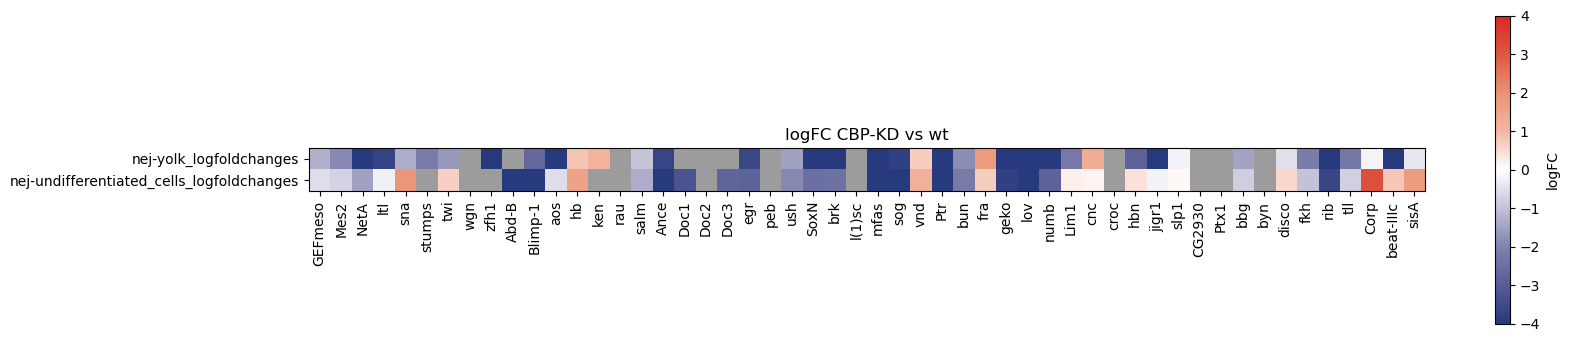

In [115]:


fig,axs=plt.subplots(1,1,figsize=(18,4))
shw1=plt.imshow(resfc.where(keep_pct).T,cmap=cmap_blured,#linewidths=0.2, linecolor='white',  #annot=True, 
           norm=divnorm, # colors.TwoSlopeNorm(vmin=-2.5, vcenter=0., vmax=2.5) 
               )
plt.grid(visible=False)
plt.title('logFC CBP-KD vs wt')
plt.xlabel('')
axs.set_xticks(np.arange(len(all_markes)))
axs.set_xticklabels(all_markes,rotation=90 )
axs.set_yticks(np.arange(len(resfc.columns)))
axs.set_yticklabels(resfc.columns,rotation=0 )
bar1 = plt.colorbar(shw1)
bar1.set_label('logFC')

# for i,g in enumerate(resppv.index):
#     for j,m in enumerate(all_markes):
#         try:
#             text = axs.text(j, i, resppvsign.loc[g, m],fontsize=10,
#                            ha="center", va="center", color="k")
# text = axs.text(-6, 6, '*: adj.pvalue < 0.05',fontsize=10,
#                            ha="center", va="center", color="k")


#plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/aprile24/heatmap_with_thresholds/heatmap_CBP_vs_wt_RNA_markers_threshold%spct.pdf'%(threshold))

In [89]:
resfc.where(keep_pct).to_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_heatmap_cbp_vs_wt_markers_threshold%s.csv'%(threshold))

# Average logFC

In [116]:
resfc=resfc.where(keep_pct)


In [117]:
fc_average={}
for k, v in markers2.items():
    fc_average[k]=resfc.loc[v].mean()
    

In [118]:
fc_average=pd.DataFrame.from_dict(fc_average)

In [119]:
fc_average=fc_average[['Mesoderm markers','Yolk cells',  'Posterior endoderm markers','Dorsal ectoderm markers','Anterioposterior ectoderm',
        'Neuroectoderm markers','Anterior endoderm markers','Ventral Ectoderm Markers']]

In [120]:
col2=fc_average.index
col2=[e.replace('nej-','CBP-KD_vs_wt_-_').replace('_logfoldchanges','').replace('_',' ') for e in col2]

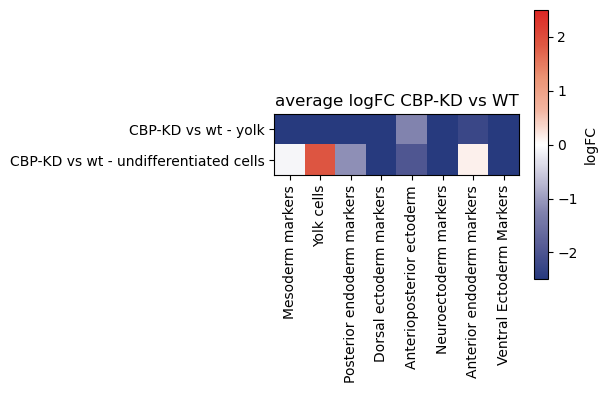

In [121]:
fig,axs=plt.subplots(1,1,figsize=(6,4))
shw1=plt.imshow(fc_average,cmap=cmap_blured,#linewidths=0.2, linecolor='white',  #annot=True, 
            
                norm=colors.TwoSlopeNorm(vmin=-2.5, vcenter=0., vmax=2.5) 
               )
plt.grid(visible=False)
plt.title('average logFC CBP-KD vs WT')
plt.xlabel('')
axs.set_xticks(np.arange(8))
axs.set_xticklabels(fc_average.columns,rotation=90 )
axs.set_yticks(np.arange(len(fc_average.index)))
axs.set_yticklabels(col2,rotation=0 )
bar1 = plt.colorbar(shw1)
bar1.set_label('logFC', fontsize=10)
plt.tight_layout()


##plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/heatmap_CBP_vs_wt_RNA_markers_avgFC_onlysignificatives.pdf')

plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/aprile24/heatmap_with_thresholds/heatmap_CBP_vs_wt_RNA_markers_avgFC_threshold%spct(2).pdf'%(threshold))
#plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/heatmap_CBP_vs_wt_RNA_avgFC_markers_threshold03pct.pdf')